The resulting graphs are plotted under this lines of code! 
- THE FIRST GRAPH IS THE WHOLE NETWORK
- THE OTHERS GRAPH RESPRESENT THE EGO NETWORK OF SPECIFIC ACTORS!

# Code

In [1]:
class Ego_Network:
    
    " Ego network: once specified the numbers of connection between the actors (actors   \
      this case the letters from a to z) the code will genereate n number of links       \
      betwen them(default = 150) and then with the function ego_chal it will return    \
      the plot of the ego network of that particular actor and some statistic of that network "
    
    def __init__(self, n_of_actors=150, seed=4):

        if type(n_of_actors)!= int or type(seed)!= int:
            raise ValueError("Must be an integer")
        else:
            self._network = nx.DiGraph()
            # creating the nodes
            for iel in range(97,122):
                self._network.add_node(chr(iel))
            # creating random connections
            for iel in range(n_of_actors):
                x,y = chr(rd.randint(97, 122)), chr(rd.randint(97, 122))
                self._network.add_edge(x,y)
    
    def ego_chal(self, letter = "b"):
        self._ego = letter
        # some general information
        in_edges = [x[0] for x in (list(self._network.in_edges(letter)))]
        edges = [x[1] for x in (list(self._network.edges(letter)))]
        print("the ego that whe are looking for is - {} -".format(letter.upper()))
        print("the incoming edge are {}, so has indegree= {}".format(in_edges, len(in_edges)))
        print("the outcoming edge are {}, so has outdegree= {}".format(edges, len(edges)))
        print("the total degree is= {}". format( len(in_edges)+len(edges)))
        print("\nRed edges are the outcoming edge, the green ones are the incoming edges while the blue ones means\
        that they are connected each other \nThe big blue node is our Ego")
        ### create the graph which regard only the Ego
        the_new_ego_graph = nx.DiGraph()
        for tupla in self._network.in_edges(letter):
            the_new_ego_graph.add_edge(list(tupla)[0],list(tupla)[1])
        for tupla in self._network.edges(letter):
            the_new_ego_graph.add_edge(list(tupla)[1],list(tupla)[0])
        # creating a list of color to mark the Ego
        size = []
        color = []
        for key in the_new_ego_graph:
            if key != self._ego:
                color.append("orange")
                size.append(500)
            else:
                size.append(4000)
                color.append("lightblue")
        # plot the nodes
        plt.figure(3,figsize=(7,7))
        pos=nx.spring_layout(the_new_ego_graph)
        nx.draw(the_new_ego_graph, pos, cmap=plt.get_cmap('jet'),\
                               node_color = color, node_size = size)
        nx.draw_networkx_labels(the_new_ego_graph, pos)
        # plot the edges
        incoming_edge = list(self._network.in_edges(letter))
        out_edge = list(self._network.out_edges(letter))
        out_edge2 = list(self._network.edges(letter))
        new_in = incoming_edge[:]
        new_out = out_edge2[:]
        both = []
        for out in out_edge2:
            for in_ in new_in:
                if out[1] == in_[0]:
                    both.append((out[1], in_[1]))
                    new_out.remove(out)
                    new_in.remove(in_)
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=new_in, edge_color='green', arrows=False,width= 3, labels="In")
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=new_out,edge_color="red" ,arrows=False, width=3, labels="Out")
        nx.draw_networkx_edges(the_new_ego_graph, pos, edgelist=both,edge_color="blue" ,arrows=False, width=3, labels="Out")
        
    def plot_all_network(self):
        dim = [1000]*len(self._network.nodes())
        plt.figure(3,figsize=(15,15))
        pos=nx.spring_layout(self._network)
        nx.draw(self._network, pos, cmap=plt.get_cmap('jet'),node_size=dim)
        nx.draw_networkx_labels(self._network, pos)

In [2]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
My_networx=Ego_Network(700)

# The whole network produced

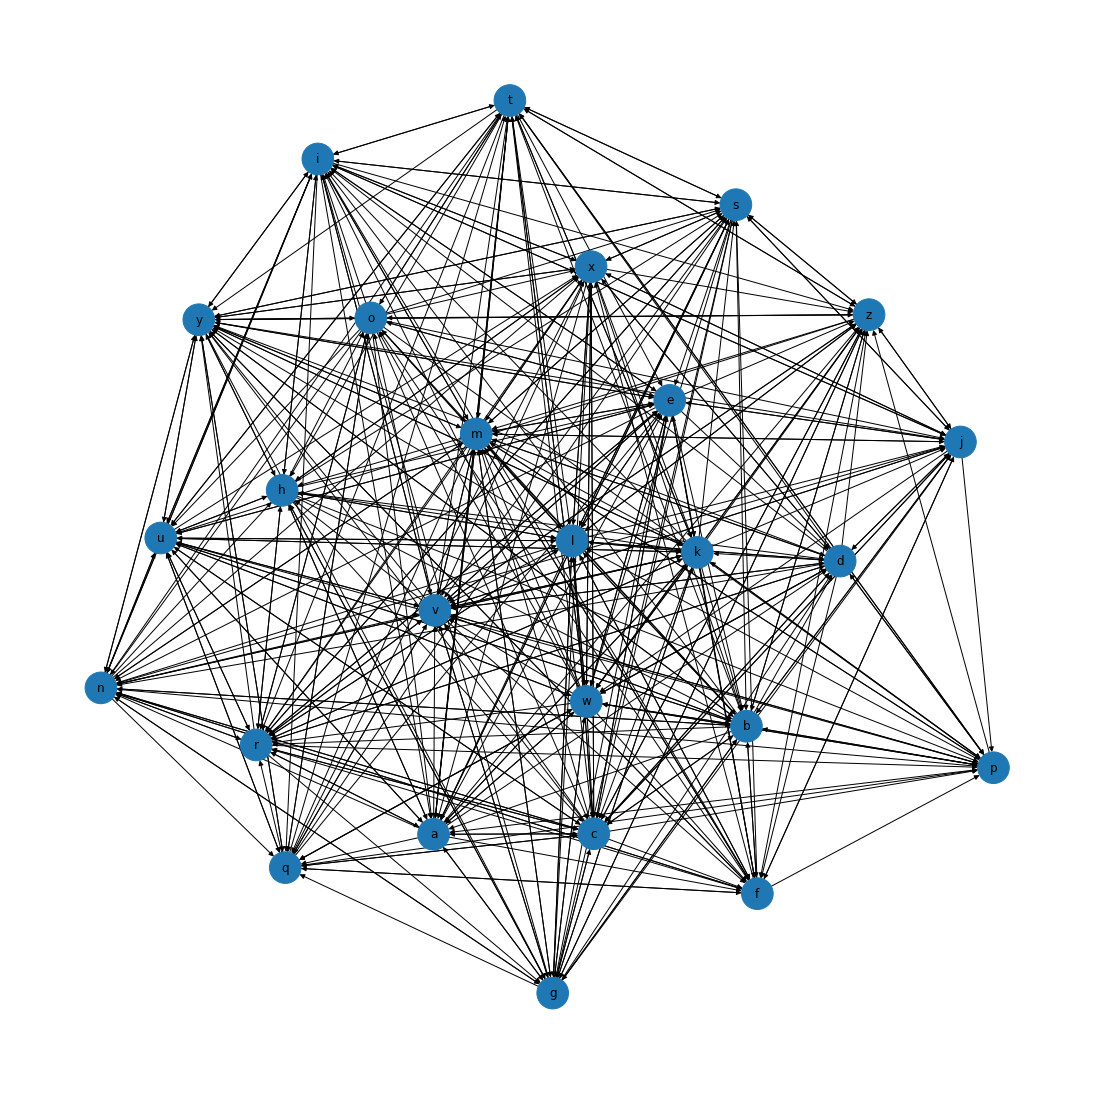

In [3]:
My_networx.plot_all_network()

# Ego network of specific actors

the ego that whe are looking for is - N -
the incoming edge are ['y', 'b', 'g', 'd', 'e', 'r', 'k', 'p', 'o', 'j', 'f', 'n', 'c', 'i', 'a', 'u', 'm'], so has indegree= 17
the outcoming edge are ['b', 'y', 'f', 'q', 't', 'i', 'k', 'g', 'u', 'h', 'c', 'x', 'v', 'l', 'n', 'r', 'm'], so has outdegree= 17
the total degree is= 34

Red edges are the outcoming edge, the green ones are the incoming edges while the blue ones means        that they are connected each other 
The big blue node is our Ego


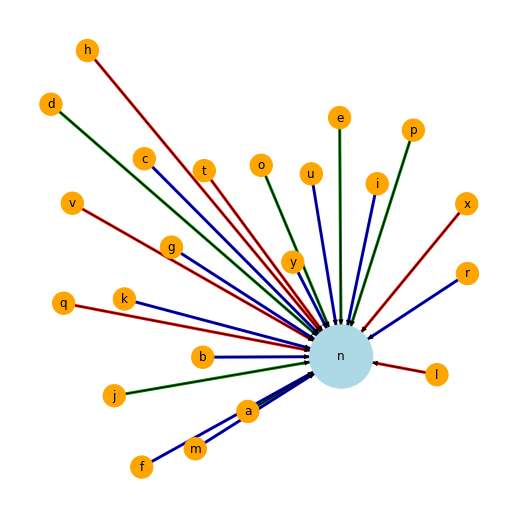

In [4]:
My_networx.ego_chal("n")

the ego that whe are looking for is - B -
the incoming edge are ['n', 'x', 'w', 'k', 'y', 'c', 'g', 'f', 'v', 'l', 'z', 'b', 'j', 's', 'u', 'p', 'e', 'o', 'h'], so has indegree= 19
the outcoming edge are ['p', 'm', 'n', 'd', 'l', 'a', 'v', 'w', 'g', 'f', 'b', 'z', 'j', 'c', 'i', 't', 'r', 'u', 'y'], so has outdegree= 19
the total degree is= 38

Red edges are the outcoming edge, the green ones are the incoming edges while the blue ones means        that they are connected each other 
The big blue node is our Ego


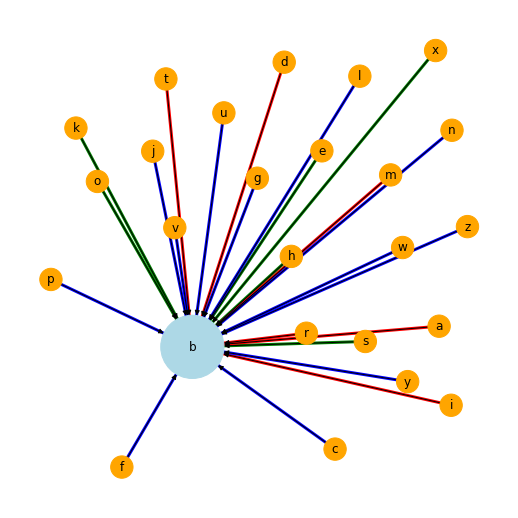

In [5]:
My_networx.ego_chal() #default letter "b"

the ego that whe are looking for is - Z -
the incoming edge are ['p', 'b', 'y', 'f', 'a', 'q', 's', 'm', 'k', 'r', 'z', 'j', 'v', 'g', 'w', 'd'], so has indegree= 16
the outcoming edge are ['i', 't', 'c', 'k', 'b', 'l', 'v', 'j', 's', 'p', 'a', 'e', 'h', 'g', 'z', 'm', 'o', 'r'], so has outdegree= 18
the total degree is= 34

Red edges are the outcoming edge, the green ones are the incoming edges while the blue ones means        that they are connected each other 
The big blue node is our Ego


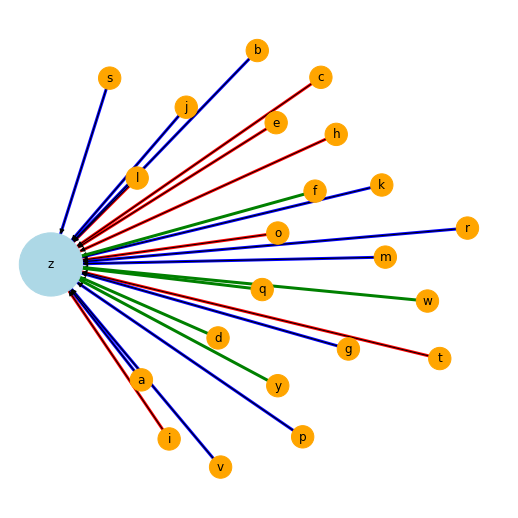

In [6]:
My_networx.ego_chal("z")